# CW2: Hospital Readmission Prediction for Diabetic Patients


### Imports and setup


In [1]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
# Using pip
%pip install seaborn --upgrade


Note: you may need to restart the kernel to use updated packages.


## Task 1: Dataset description


In [4]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")
IDs_mapping = pd.read_csv("dataset_diabetes/IDs_mapping.csv")


In [5]:
df.head().T  # More features than 5 -> transpose gives a better vue


,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [6]:
IDs_mapping.head()


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [7]:
df.columns = df.columns.str.upper()


In [8]:
print(f"df has {df.shape[1]} features and {df.shape[0]} samples")
print(f"The features are {df.columns}")


df has 50 features and 101766 samples
The features are Index(['ENCOUNTER_ID', 'PATIENT_NBR', 'RACE', 'GENDER', 'AGE', 'WEIGHT',
       'ADMISSION_TYPE_ID', 'DISCHARGE_DISPOSITION_ID', 'ADMISSION_SOURCE_ID',
       'TIME_IN_HOSPITAL', 'PAYER_CODE', 'MEDICAL_SPECIALTY',
       'NUM_LAB_PROCEDURES', 'NUM_PROCEDURES', 'NUM_MEDICATIONS',
       'NUMBER_OUTPATIENT', 'NUMBER_EMERGENCY', 'NUMBER_INPATIENT', 'DIAG_1',
       'DIAG_2', 'DIAG_3', 'NUMBER_DIAGNOSES', 'MAX_GLU_SERUM', 'A1CRESULT',
       'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE',
       'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE',
       'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE',
       'TOLAZAMIDE', 'EXAMIDE', 'CITOGLIPTON', 'INSULIN',
       'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN',
       'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE',
       'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED'],
      dtype='object')


In [9]:
# Single feature analysis -> latest studied
column = df.columns[49]  # set the column from its index

# Basic information
print(column)  # Print the column name
print(df[column].nunique())  # Number of unique values
print(df[column].unique())  # Values of the unique values

# Calculate the percentage of each unique value
value_counts = df[column].value_counts()
percentages = value_counts / len(df) * 100

# Create a new dataframe to store the results
table_data = {
    "Unique Value": value_counts.index,
    "Count": value_counts.values,
    "Percentage": percentages.values,
}
table_df = pd.DataFrame(table_data)

# Sort the dataframe by count in descending order
table_df = table_df.sort_values(by="Count", ascending=False)

table_df


READMITTED
3
['NO' '>30' '<30']


,Unique Value,Count,Percentage
0,NO,54864,53.911916
1,>30,35545,34.928169
2,<30,11357,11.159916


In [10]:
# df.isnull().sum()
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_data = pd.DataFrame(
    {"Missing Count": missing_count, "Missing Percentage": missing_percent}
)
missing_data


,Missing Count,Missing Percentage
ENCOUNTER_ID,0,0.000000
PATIENT_NBR,0,0.000000
RACE,0,0.000000
GENDER,0,0.000000
AGE,0,0.000000
WEIGHT,0,0.000000
ADMISSION_TYPE_ID,0,0.000000
DISCHARGE_DISPOSITION_ID,0,0.000000
ADMISSION_SOURCE_ID,0,0.000000
TIME_IN_HOSPITAL,0,0.000000


In [11]:
for col in df.columns:
    if df[col].dtype == object:
        missing_count = df[col][
            df[col] == "?"
        ].count()  # According to the metadata, more unknown values than NaN values: unknown are specified by"?
        missing_percent = (missing_count / len(df)) * 100
        print(
            f"{col}: {missing_count} , {missing_percent:.2f}"
        )  # Assessing how important the missing data is


RACE: 2273 , 2.23
GENDER: 0 , 0.00
AGE: 0 , 0.00
WEIGHT: 98569 , 96.86
PAYER_CODE: 40256 , 39.56
MEDICAL_SPECIALTY: 49949 , 49.08
DIAG_1: 21 , 0.02
DIAG_2: 358 , 0.35
DIAG_3: 1423 , 1.40
MAX_GLU_SERUM: 0 , 0.00
A1CRESULT: 0 , 0.00
METFORMIN: 0 , 0.00
REPAGLINIDE: 0 , 0.00
NATEGLINIDE: 0 , 0.00
CHLORPROPAMIDE: 0 , 0.00
GLIMEPIRIDE: 0 , 0.00
ACETOHEXAMIDE: 0 , 0.00
GLIPIZIDE: 0 , 0.00
GLYBURIDE: 0 , 0.00
TOLBUTAMIDE: 0 , 0.00
PIOGLITAZONE: 0 , 0.00
ROSIGLITAZONE: 0 , 0.00
ACARBOSE: 0 , 0.00
MIGLITOL: 0 , 0.00
TROGLITAZONE: 0 , 0.00
TOLAZAMIDE: 0 , 0.00
EXAMIDE: 0 , 0.00
CITOGLIPTON: 0 , 0.00
INSULIN: 0 , 0.00
GLYBURIDE-METFORMIN: 0 , 0.00
GLIPIZIDE-METFORMIN: 0 , 0.00
GLIMEPIRIDE-PIOGLITAZONE: 0 , 0.00
METFORMIN-ROSIGLITAZONE: 0 , 0.00
METFORMIN-PIOGLITAZONE: 0 , 0.00
CHANGE: 0 , 0.00
DIABETESMED: 0 , 0.00
READMITTED: 0 , 0.00


In [12]:
# Identify patients with an unknown race
unknown_race_patients = df[df["RACE"] == "?"][["PATIENT_NBR", "RACE"]]

# Find duplicated patients within the unknown_race_patients DataFrame
# 'keep=False' marks all duplicates as True
multiple_unknown_race_patients = unknown_race_patients[
    unknown_race_patients.duplicated("PATIENT_NBR", keep=False)
]

multiple_unknown_race_patients


,PATIENT_NBR,RACE
480,707769,?
580,707769,?
1780,3350520,?
3420,25959105,?
3607,14784876,?
...,...,...
101263,38090619,?
101445,38321100,?
101525,38237868,?
101584,130760222,?


In [13]:
df.shape


(101766, 50)

In [14]:
df.info()  # objecttype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ENCOUNTER_ID              101766 non-null  int64 
 1   PATIENT_NBR               101766 non-null  int64 
 2   RACE                      101766 non-null  object
 3   GENDER                    101766 non-null  object
 4   AGE                       101766 non-null  object
 5   WEIGHT                    101766 non-null  object
 6   ADMISSION_TYPE_ID         101766 non-null  int64 
 7   DISCHARGE_DISPOSITION_ID  101766 non-null  int64 
 8   ADMISSION_SOURCE_ID       101766 non-null  int64 
 9   TIME_IN_HOSPITAL          101766 non-null  int64 
 10  PAYER_CODE                101766 non-null  object
 11  MEDICAL_SPECIALTY         101766 non-null  object
 12  NUM_LAB_PROCEDURES        101766 non-null  int64 
 13  NUM_PROCEDURES            101766 non-null  int64 
 14  NUM_

In [15]:
object_cols = df.select_dtypes(include="object").shape[1]
int_cols = df.select_dtypes(include="int64").shape[1]

print(f"Number of object columns: {object_cols}")
print(f"Number of int64 columns: {int_cols}")


Number of object columns: 37
Number of int64 columns: 13


In [16]:
# Unique values per feature
for i in list(df.columns):
    print(
        "Number of Unique values in {} :  {} ".format(i, df[i].value_counts().shape[0])
    )


Number of Unique values in ENCOUNTER_ID :  101766 
Number of Unique values in PATIENT_NBR :  71518 
Number of Unique values in RACE :  6 
Number of Unique values in GENDER :  3 
Number of Unique values in AGE :  10 
Number of Unique values in WEIGHT :  10 
Number of Unique values in ADMISSION_TYPE_ID :  8 
Number of Unique values in DISCHARGE_DISPOSITION_ID :  26 
Number of Unique values in ADMISSION_SOURCE_ID :  17 
Number of Unique values in TIME_IN_HOSPITAL :  14 
Number of Unique values in PAYER_CODE :  18 
Number of Unique values in MEDICAL_SPECIALTY :  73 
Number of Unique values in NUM_LAB_PROCEDURES :  118 
Number of Unique values in NUM_PROCEDURES :  7 
Number of Unique values in NUM_MEDICATIONS :  75 
Number of Unique values in NUMBER_OUTPATIENT :  39 
Number of Unique values in NUMBER_EMERGENCY :  33 
Number of Unique values in NUMBER_INPATIENT :  21 
Number of Unique values in DIAG_1 :  717 
Number of Unique values in DIAG_2 :  749 
Number of Unique values in DIAG_3 :  790 

In [17]:
df["GENDER"].unique()


array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    ------
        dataframe: dataframe

        cat_th: int, optional

        car_th: int, optional
    Returns
    ------
        cat_cols: list
                Categorical features
        num_cols: list
                Numerical features
        cat_but_car: list
               Categorical view cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"
    ]
    cat_but_car = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"
    ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    # print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 101766
Variables: 50
cat_cols: 35
num_cols: 11
cat_but_car: 4


In [19]:
id_cols = [
    "ENCOUNTER_ID",
    "PATIENT_NBR",
    "DISCHARGE_DISPOSITION_ID",
    "ADMISSION_SOURCE_ID",
    "ADMISSION_TYPE_ID",
]
num_cols = [col for col in num_cols if col not in id_cols]


In [20]:
# FEATURE SEPARATION

## TARGET
target = "READMITTED"
print(f"The target is {target}")

## FEATURES
### DEFINING
num_cols.append("NUM_PROCEDURES")

### PRINTING
print("cat_cols:", len(cat_cols), cat_cols)
print("num_cols:", len(num_cols), num_cols)
print("cat_but_car:", len(cat_but_car), cat_but_car)
print("id_columns", len(id_cols), id_cols)


The target is READMITTED
cat_cols: 35 ['RACE', 'GENDER', 'AGE', 'WEIGHT', 'PAYER_CODE', 'MAX_GLU_SERUM', 'A1CRESULT', 'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE', 'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE', 'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE', 'TOLAZAMIDE', 'EXAMIDE', 'CITOGLIPTON', 'INSULIN', 'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN', 'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE', 'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED', 'ADMISSION_TYPE_ID', 'NUM_PROCEDURES']
num_cols: 8 ['TIME_IN_HOSPITAL', 'NUM_LAB_PROCEDURES', 'NUM_MEDICATIONS', 'NUMBER_OUTPATIENT', 'NUMBER_EMERGENCY', 'NUMBER_INPATIENT', 'NUMBER_DIAGNOSES', 'NUM_PROCEDURES']
cat_but_car: 4 ['MEDICAL_SPECIALTY', 'DIAG_1', 'DIAG_2', 'DIAG_3']
id_columns 5 ['ENCOUNTER_ID', 'PATIENT_NBR', 'DISCHARGE_DISPOSITION_ID', 'ADMISSION_SOURCE_ID', 'ADMISSION_TYPE_ID']


In [21]:
object_cols = df.select_dtypes(include="object").columns
object_cols_not_in_cat = [
    col for col in object_cols if col not in cat_med and col not in cat_nonmed
]
object_cols_not_in_cat


NameError: name 'cat_med' is not defined

### Target encoding


In [ ]:
unique_values = df[target].unique()
print(unique_values)
value_counts = df[target].value_counts()
print(value_counts)


['NO' '>30' '<30']
READMITTED
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [ ]:
# Target encoding -> Binary classification
df["READMITTED"] = df["READMITTED"].apply(lambda x: 0 if x == "NO" else 1)


In [ ]:
unique_values = df["READMITTED"].unique()
print(unique_values)
value_counts = df["READMITTED"].value_counts()
print(value_counts)


[0 1]
READMITTED
0    54864
1    46902
Name: count, dtype: int64


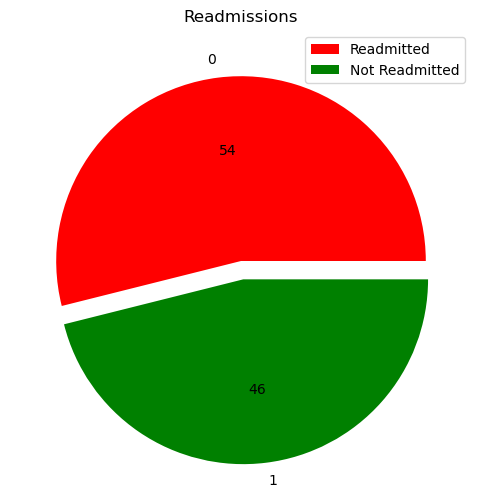

In [ ]:
labels = df[target].unique()
count = df[target].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    count,
    labels=labels,
    autopct="%.0f",
    explode=(0, 0.1),
    colors=["red", "green"],
)
plt.legend(["Readmitted", "Not Readmitted"], loc=1)

plt.title("Readmissions")
plt.show()


In [ ]:
duplicate_patients = df[df.duplicated(subset="PATIENT_NBR", keep=False)]
count_duplicate_patients = duplicate_patients["PATIENT_NBR"].nunique()
percent_duplicate_patients = (
    100 * count_duplicate_patients / df["PATIENT_NBR"].nunique()
)
print(f"The number of patients with duplicate entries is: {count_duplicate_patients}")
print(
    f"The percent of patients with duplicate entries is: {percent_duplicate_patients} %"
)


The number of patients with duplicate entries is: 16773
The percent of patients with duplicate entries is: 23.452837048015883 %


In [ ]:
df_simplified = df.groupby("PATIENT_NBR").head(2)


In [ ]:
df_simplified.shape


(88291, 50)

In [ ]:
unique_values = df_simplified["READMITTED"].unique()
print(unique_values)
value_counts = df_simplified["READMITTED"].value_counts()
print(value_counts)


[0 1]
READMITTED
0    50582
1    37709
Name: count, dtype: int64


In [ ]:
duplicate_patients = df_simplified[
    df_simplified.duplicated(subset="PATIENT_NBR", keep=False)
]
count_duplicate_patients = duplicate_patients["PATIENT_NBR"].nunique()
percent_duplicate_patients = (
    100 * count_duplicate_patients / df_simplified["PATIENT_NBR"].nunique()
)
print(f"The number of patients with duplicate entries is: {count_duplicate_patients}")
print(
    f"The percent of patients with duplicate entries is: {percent_duplicate_patients} %"
)


The number of patients with duplicate entries is: 16773
The percent of patients with duplicate entries is: 23.452837048015883 %


#### 1. Numerical columns


In [ ]:
df_num = df[num_cols]


In [ ]:
df_num.describe().T


,count,mean,std,min,25%,50%,75%,max
TIME_IN_HOSPITAL,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
NUM_LAB_PROCEDURES,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
NUM_MEDICATIONS,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
NUMBER_OUTPATIENT,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
NUMBER_EMERGENCY,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
NUMBER_INPATIENT,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
NUMBER_DIAGNOSES,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


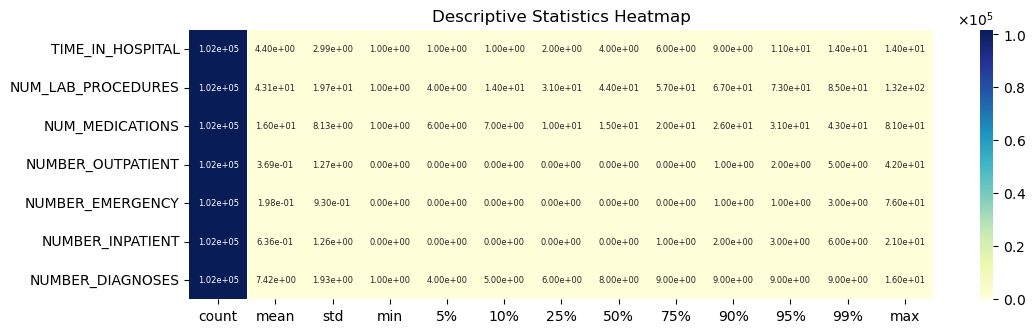

In [ ]:
# Statistical heatmap

import matplotlib.ticker as ticker

# Specified quantiles
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]

# Calculating descriptive statistics for each numerical column at the specified quantiles
stats_df = df_num.describe(quantiles).T

# Creating the heatmap
plt.figure(figsize=(12, len(num_cols) * 0.5))  # Adjust figure size as needed
sns.heatmap(stats_df, annot=True, cmap="YlGnBu", fmt=".2e", annot_kws={"size": 6})

# Format the tick labels on the colorbar
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(formatter)

plt.title("Descriptive Statistics Heatmap")
plt.show()


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_46319/3423890617.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num.hist(bins=20, ax=ax[0])


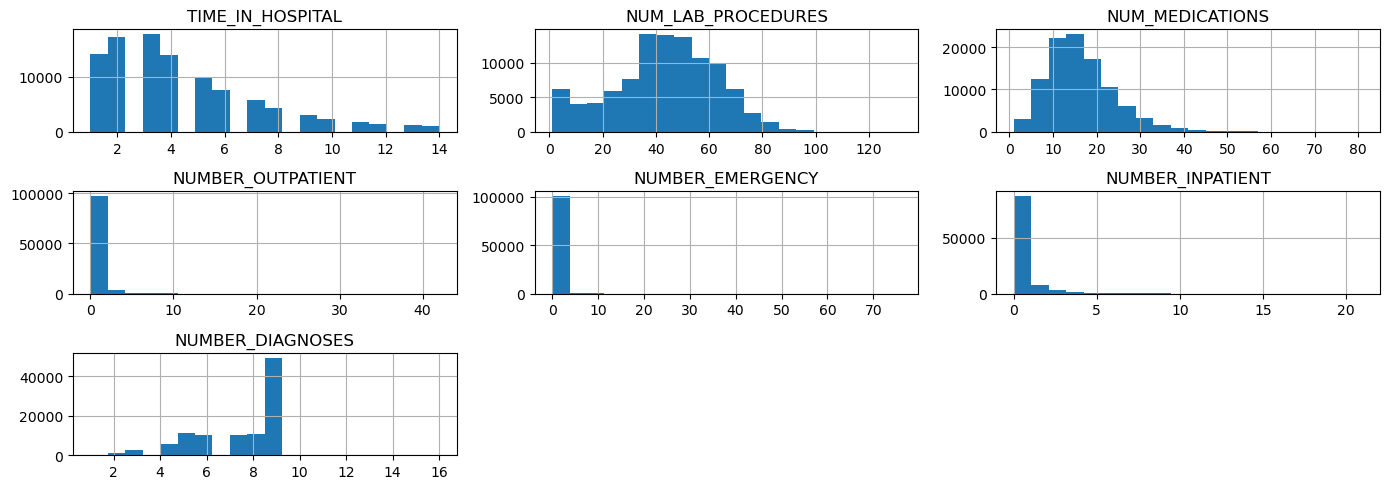

In [ ]:
# Normal histograms for all numerical values

fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns for two subplots
df_num.hist(bins=20, ax=ax[0])
ax[0].set_xlabel(num_cols)
ax[0].set_title(num_cols)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_46319/1588227665.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="READMITTED", data=df, ax=axes[1], palette="Set2")


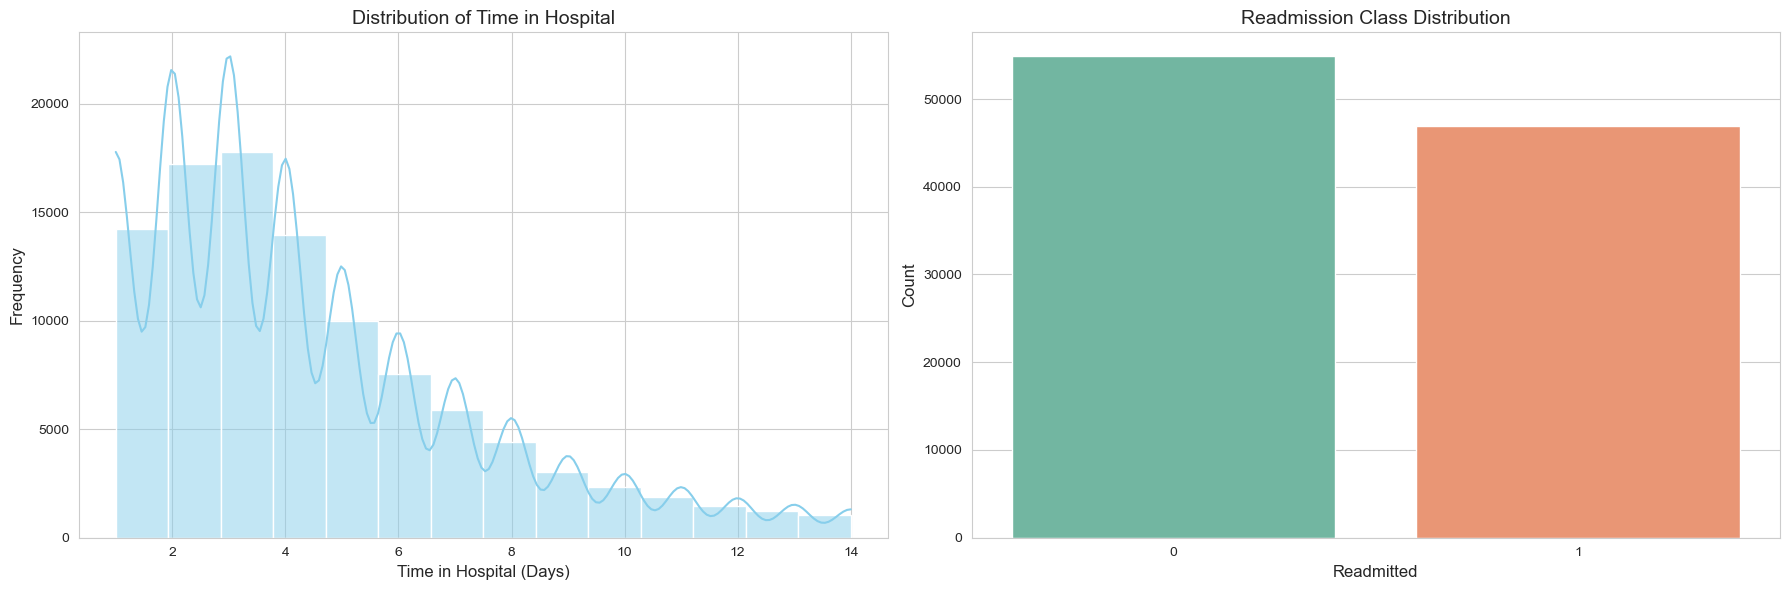

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for a numerical feature - 'TIME_IN_HOSPITAL' as an example
sns.histplot(df["TIME_IN_HOSPITAL"], bins=14, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Time in Hospital", fontsize=14)
axes[0].set_xlabel("Time in Hospital (Days)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Bar plot for class distribution in 'READMITTED'
sns.countplot(x="READMITTED", data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Readmission Class Distribution", fontsize=14)
axes[1].set_xlabel("Readmitted", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


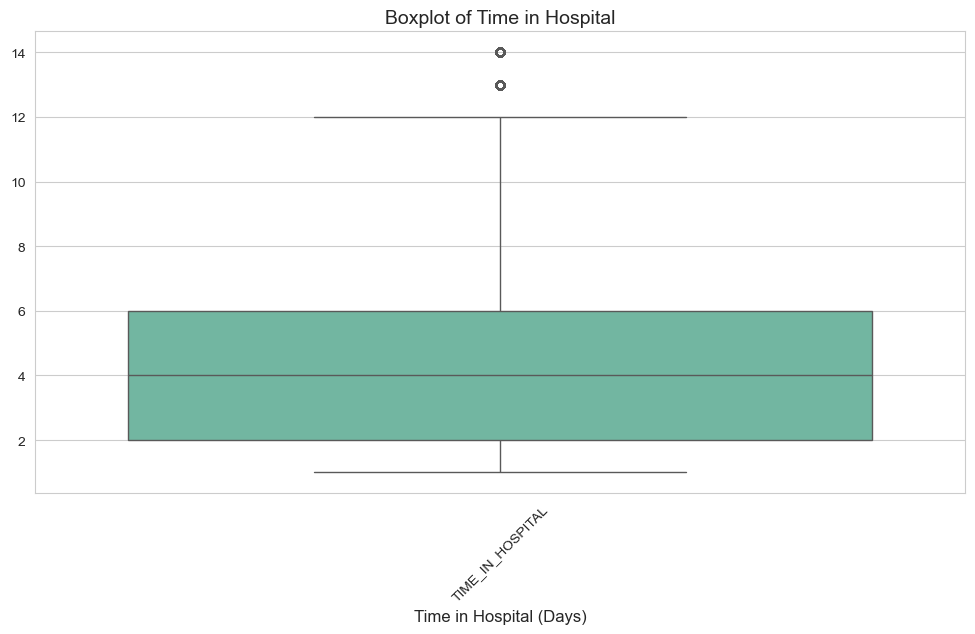

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["TIME_IN_HOSPITAL"]], palette="Set2")
plt.title("Boxplot of Time in Hospital", fontsize=14)
plt.xlabel("Time in Hospital (Days)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


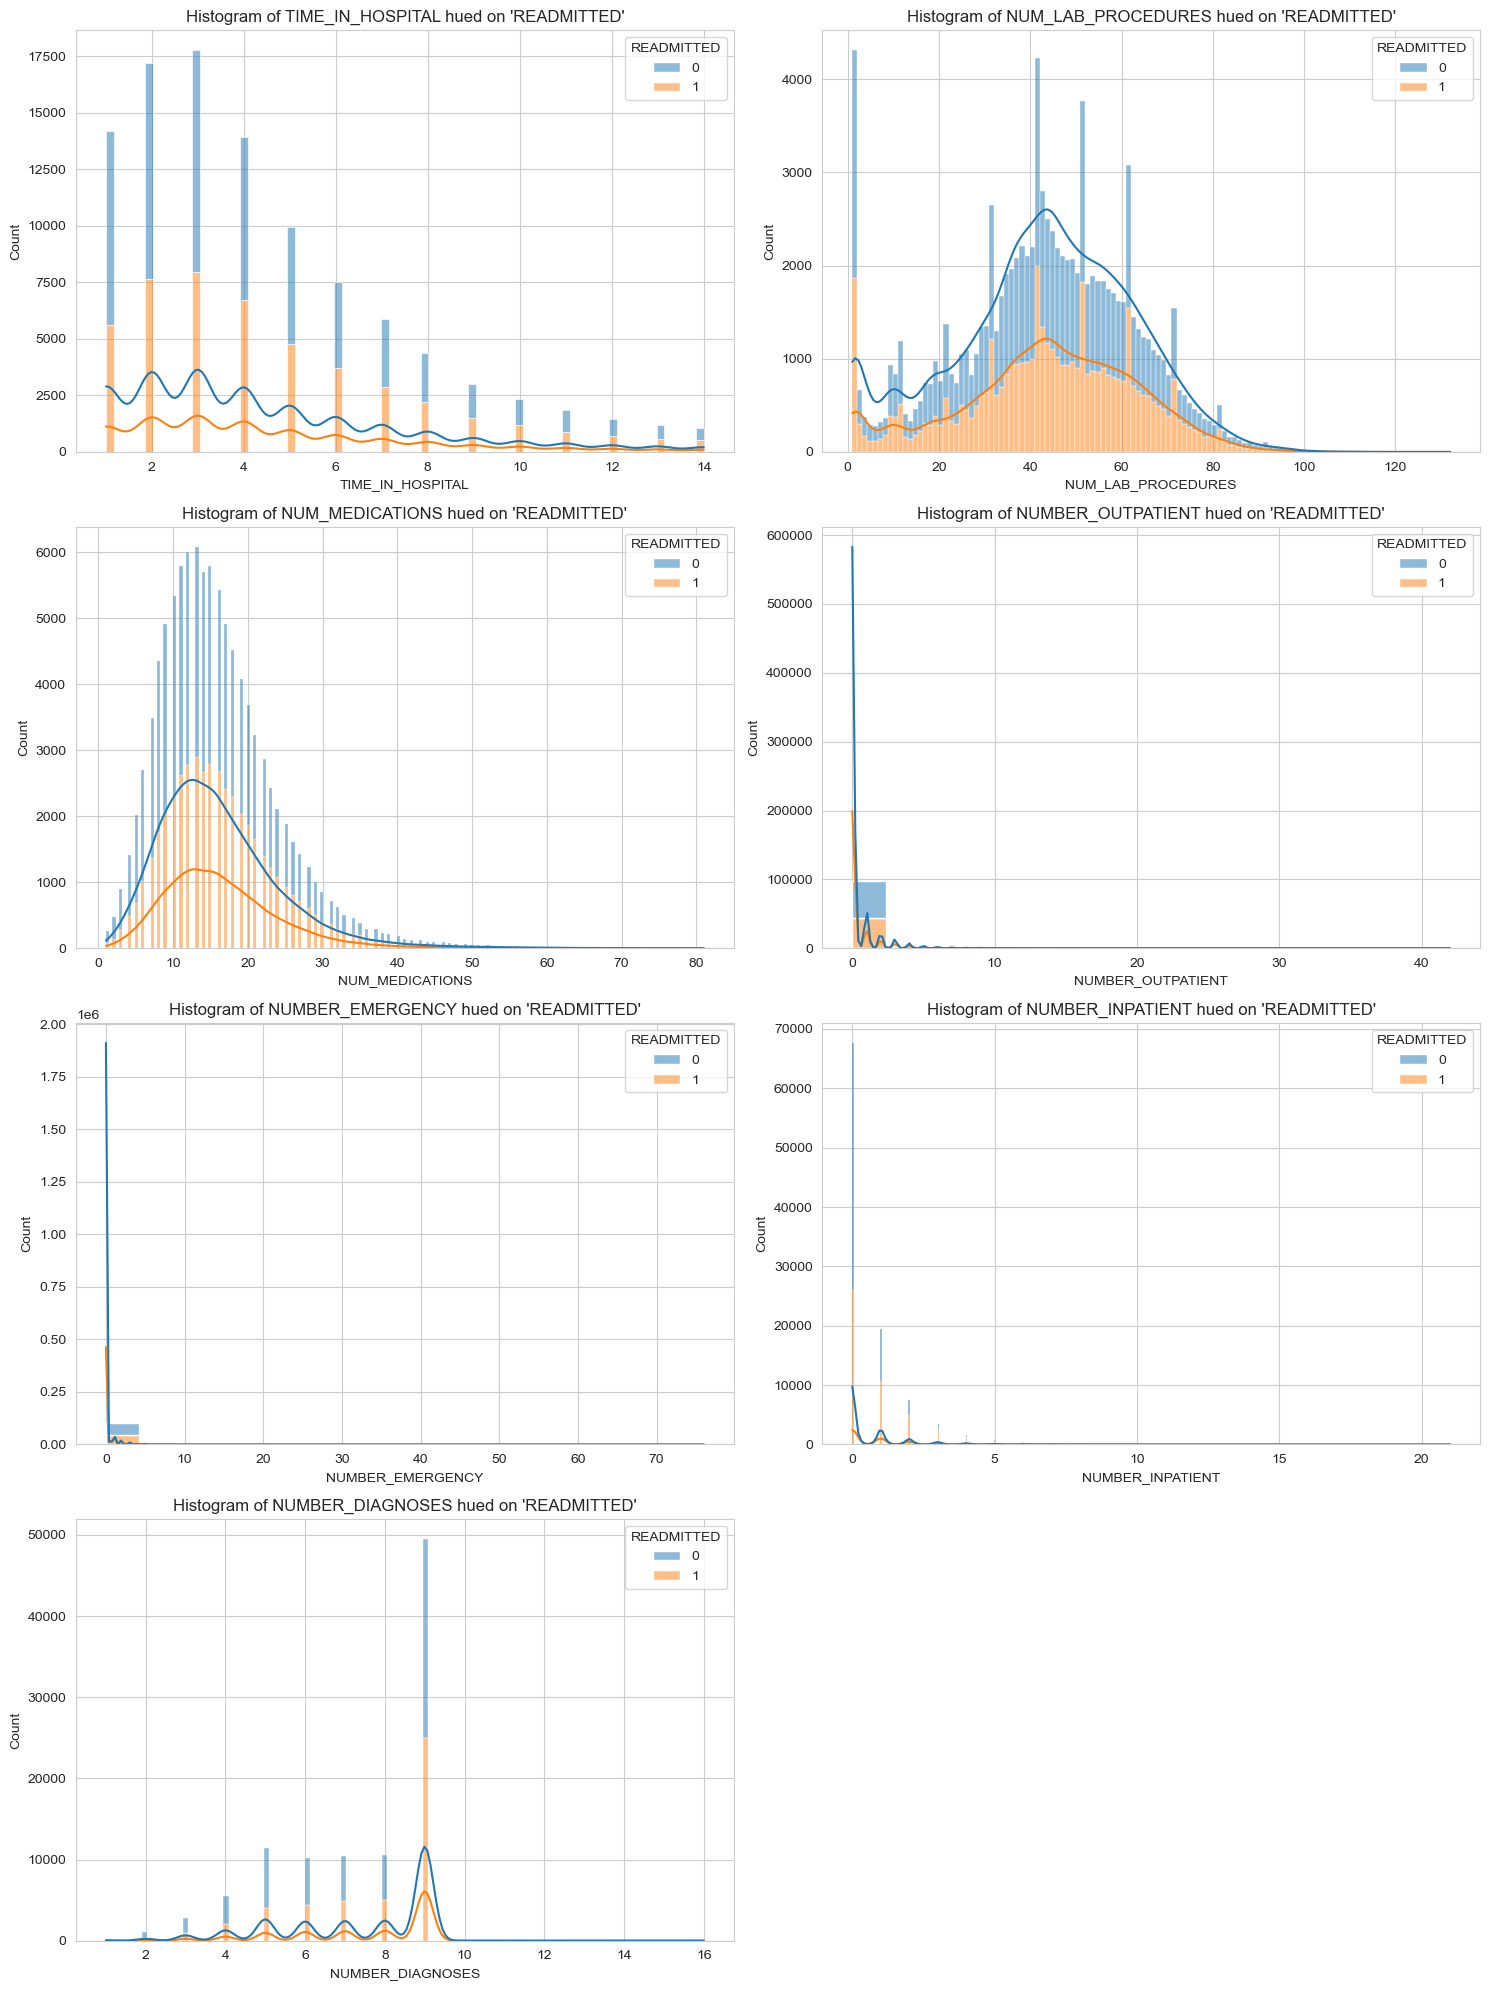

In [ ]:
# Hued histogram

fig, axes = plt.subplots(
    len(num_cols) // 2 + len(num_cols) % 2,
    2,
    figsize=(15, 5 * (len(num_cols) // 2 + len(num_cols) % 2)),
)

# Iterate over each numerical column and plot the histogram hued on "READMITTED"
for i, num_col in enumerate(
    num_cols
):  # Corrected variable name from 'col' to 'num_col'
    row = i // 2
    col_idx = i % 2  # Corrected variable name from 'col' to 'col_idx'
    sns.histplot(
        data=df,
        x=num_col,
        hue="READMITTED",
        ax=axes[row, col_idx],
        multiple="stack",
        kde=True,
    )

    # Set the title and labels for each subplot
    axes[row, col_idx].set_title(f"Histogram of {num_col} hued on 'READMITTED'")
    axes[row, col_idx].set_xlabel(num_col)
    axes[row, col_idx].set_ylabel("Count")

# If the number of numerical columns is odd, remove the last subplot (which is empty)
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


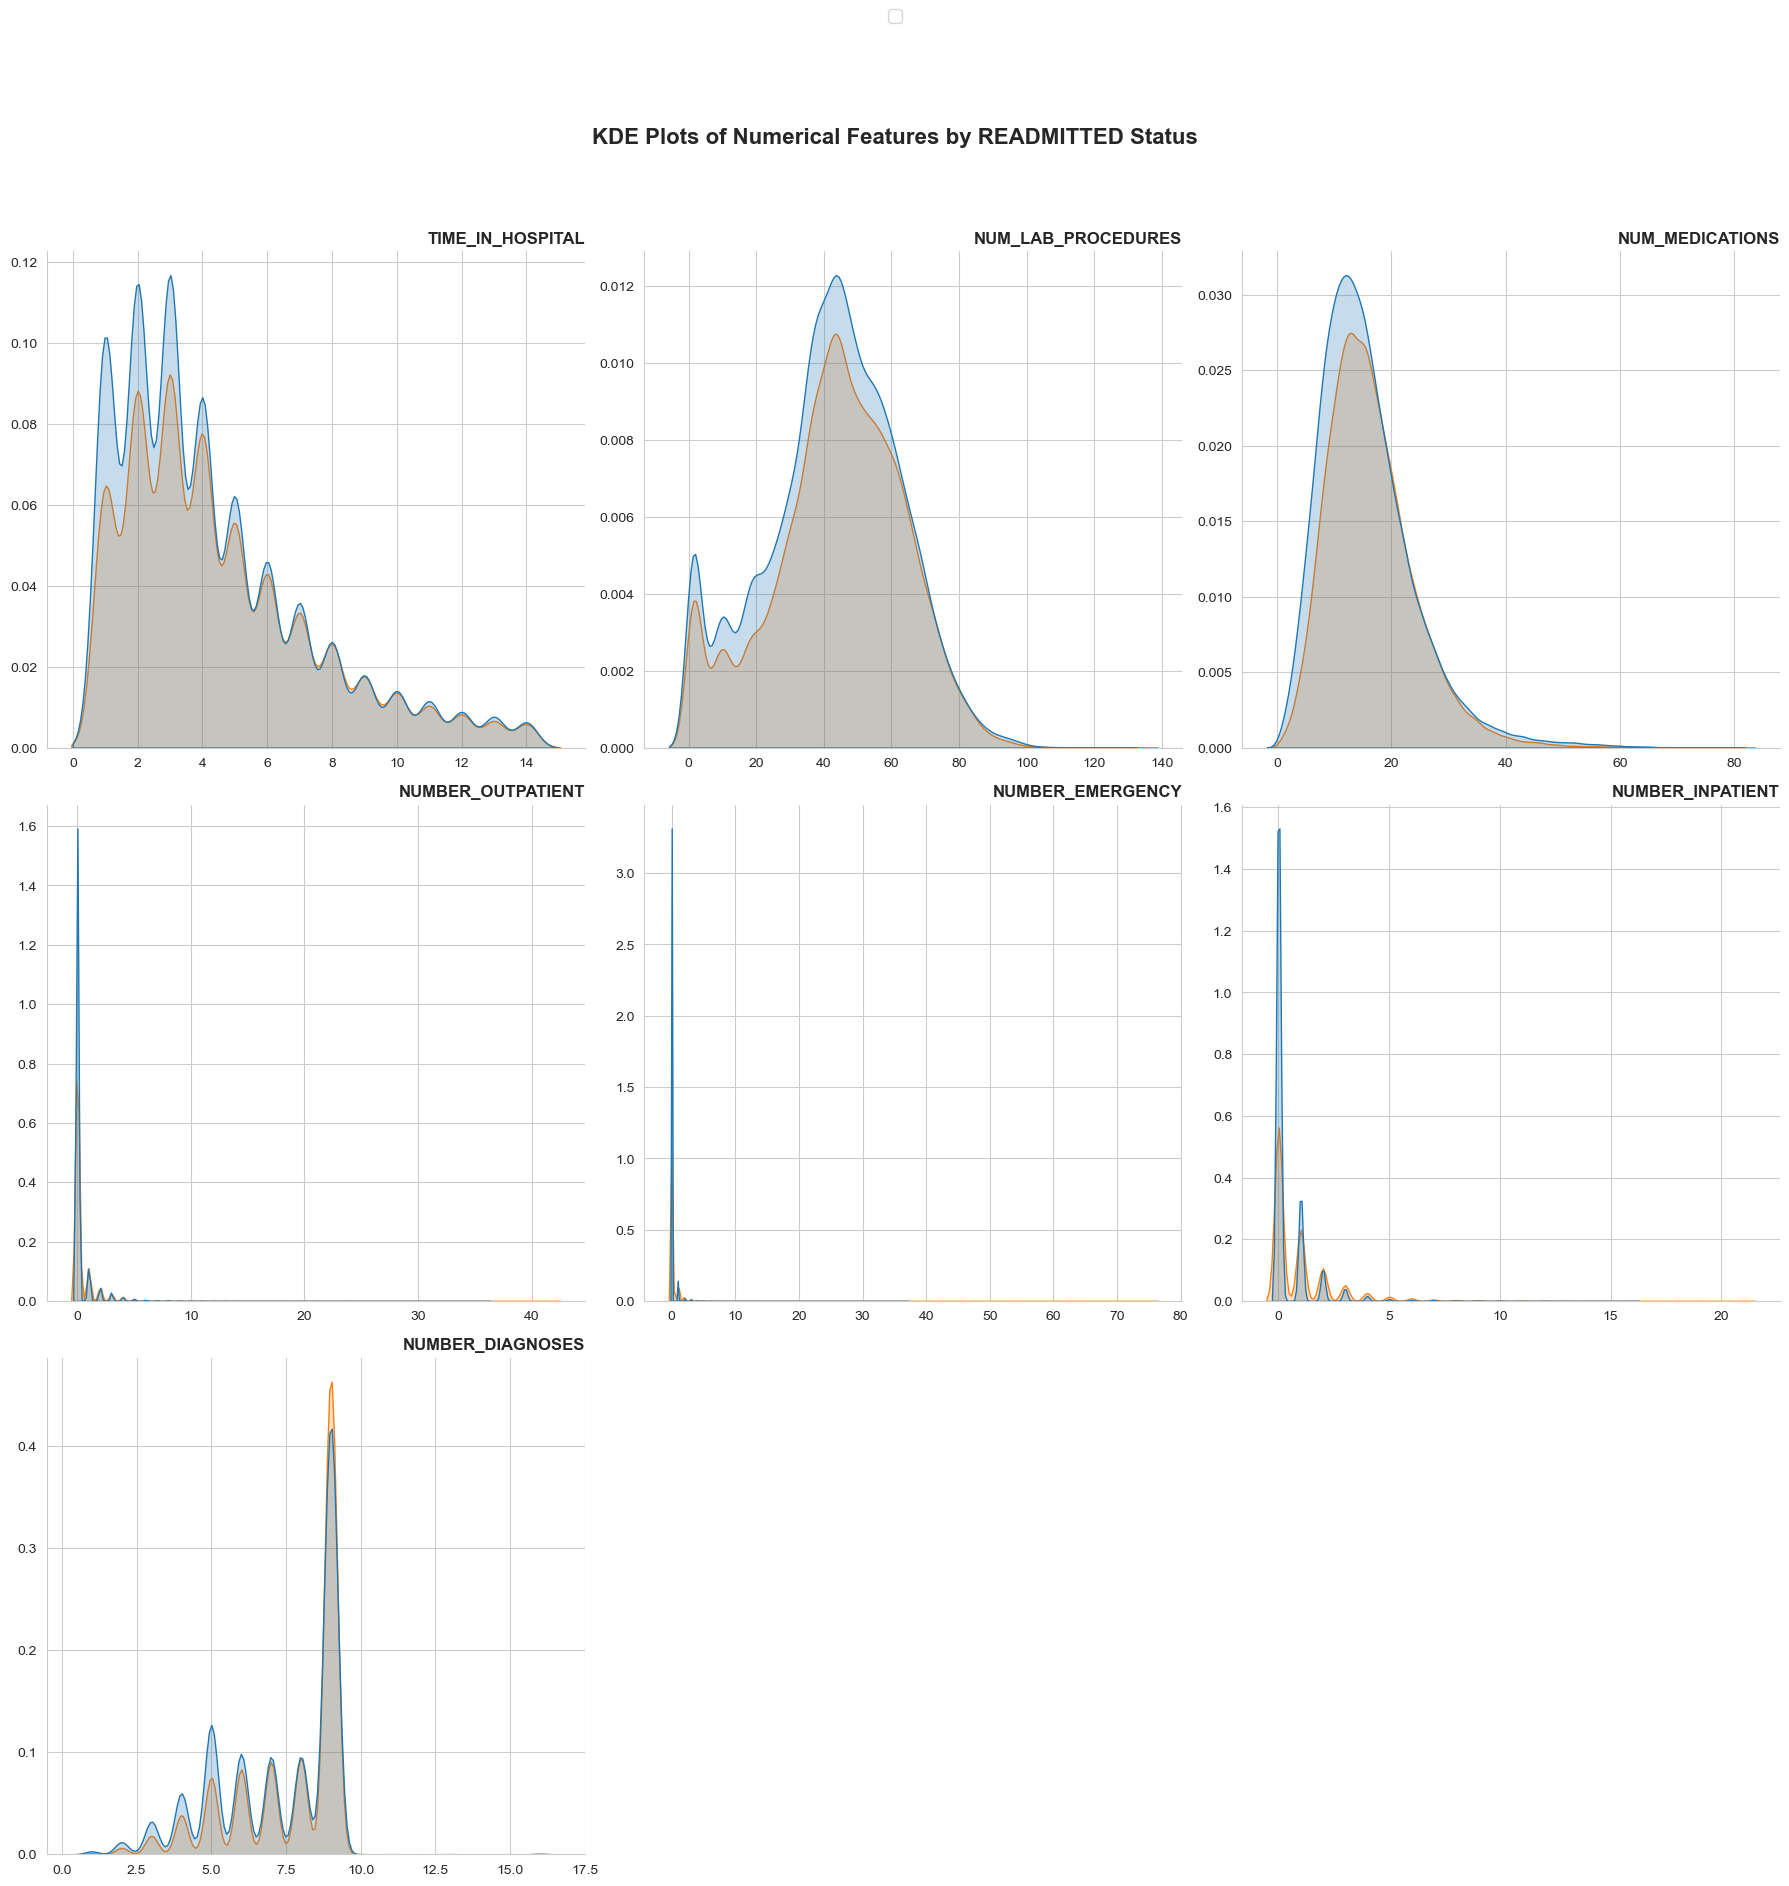

<Figure size 640x480 with 0 Axes>

In [ ]:
# KDE Plot - Target hued


# Assuming 'df' is your DataFrame and 'num_cols' is your list of numerical columns
# Assuming "READMITTED" is a binary target column in 'df'

# Determine the layout of the subplots based on the number of numerical columns
num_features = len(num_cols)
num_columns = 3  # Number of columns in the subplot grid
num_rows = num_features // num_columns + (
    num_features % num_columns > 0
)  # Calculate rows needed

figsize = (
    6 * num_columns,
    6 * num_rows,
)  # Adjusted figsize based on the number of subplots
fig = plt.figure(figsize=figsize)

for idx, col in enumerate(num_cols):
    ax = plt.subplot(num_rows, num_columns, idx + 1)
    sns.kdeplot(data=df, x=col, hue="READMITTED", fill=True, legend=False, ax=ax)

    # Improve subplot aesthetics
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("")
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{col}", loc="right", weight="bold", fontsize=12)

# Adjust the layout and add a title
plt.subplots_adjust(top=0.92)  # Adjust top spacing to fit the suptitle
fig.suptitle(
    "KDE Plots of Numerical Features by READMITTED Status",
    ha="center",
    fontweight="bold",
    fontsize=16,
)

# Add a legend outside the last subplot
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12
)

plt.tight_layout(
    rect=[0, 0, 1, 0.95]
)  # Adjust the rect parameter to make space for the title and legend
plt.show()

# Add a legend for hue colors
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout(
    rect=[0, 0, 1, 0.95]
)  # Adjust the rect parameter to make space for the title and legend
plt.show()


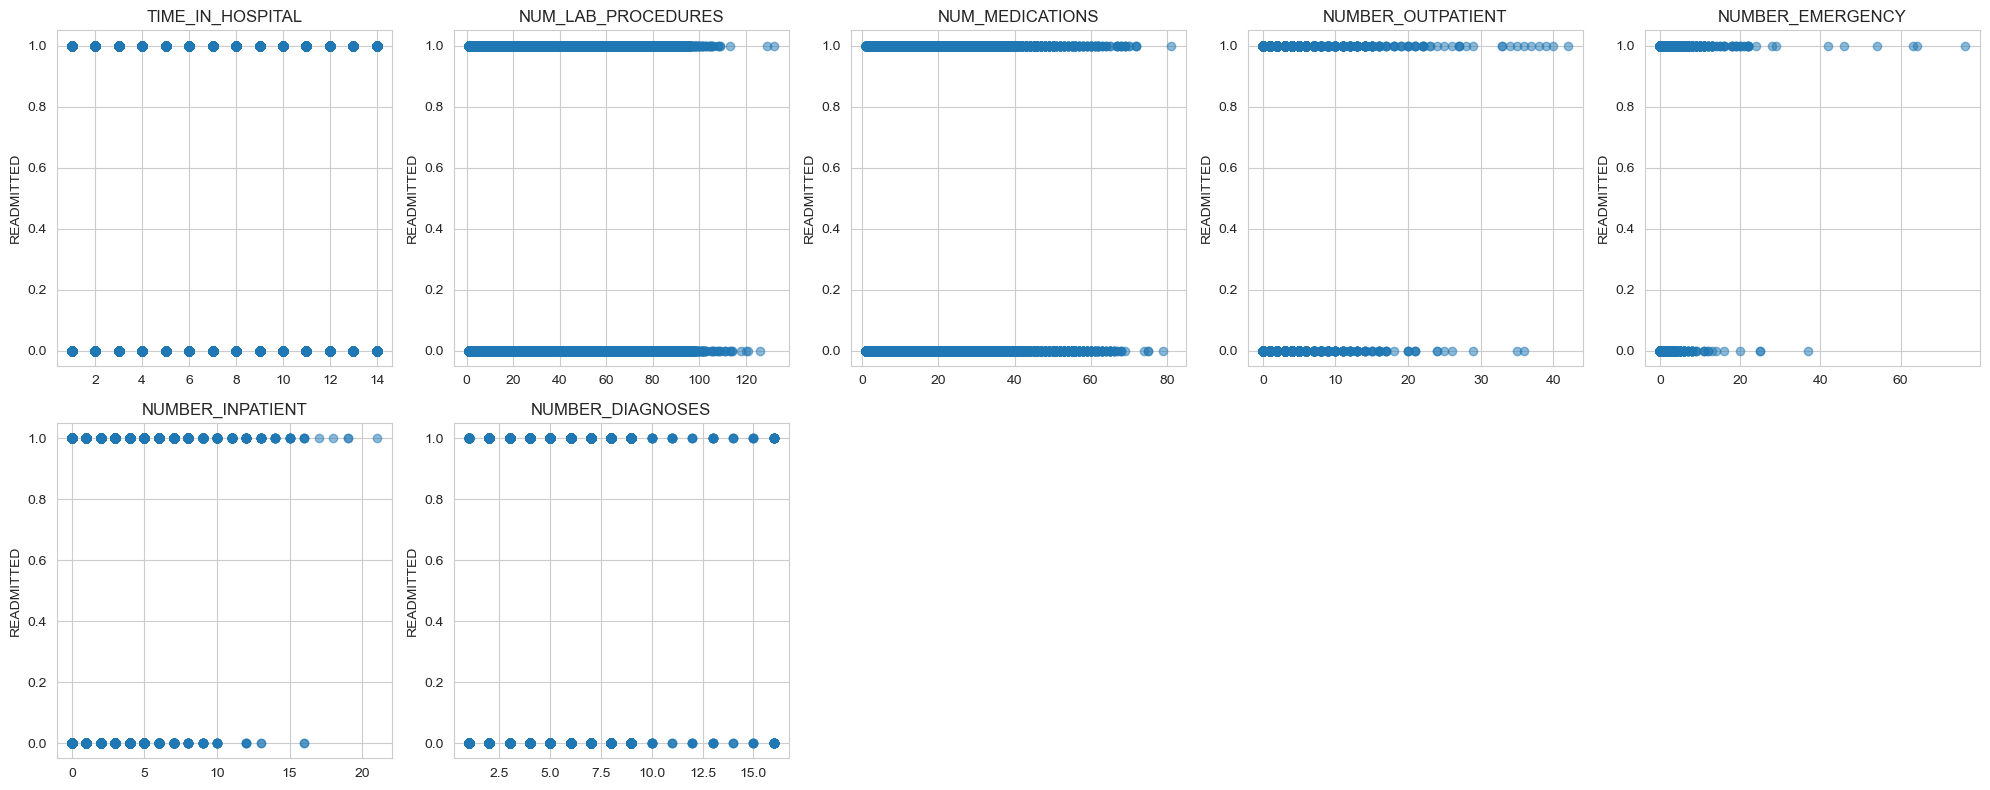

In [ ]:
# Scatter plot

# Display settings
n_cols = 5  # Number of subplot columns (you can adjust this based on your preference)
n_rows = int(np.ceil(len(df_num.columns) / n_cols))


fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(20, 4 * n_rows)
)  # Adjust the subplot grid and figure size

# Target setting
y = df["READMITTED"]

# Flatten the axes array for easy iteration if there's more than one row
if n_rows > 1:
    axes = axes.ravel()
else:
    axes = [axes]  # Ensure axes is iterable even with a single subplot

for i, ax in enumerate(axes):
    if i < len(
        df_num.columns
    ):  # Check if the current index is within the range of numerical columns
        # Plotting each numerical feature against the target variable
        ax.plot(df_num.iloc[:, i], y, "o", alpha=0.5)
        ax.set_title(f"{df_num.columns[i]}")
        ax.set_ylabel("READMITTED")
    else:
        ax.set_visible(False)  # Hide any excess axes

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot


In [ ]:
# This code snippet is creating a pairplot visualization using Seaborn library. It is plotting pairwise relationships in a dataset, specifically focusing on numerical variables, and coloring the data points based on the "READMITTED" column. The pairplot helps in visualizing relationships and distributions between different numerical variables in the dataset. The code also sets the style, context, palette, and markers for the plot to customize its appearance. The warning `# ! DO NOT RERUN -> Takes a long time` indicates that running this code may take a long time due to the potentially large size of the dataset or complexity of the plot.
# # Pairplot
# # ! DO NOT RERUN -> Takes a long time
# sns.set(style="ticks")
# sns.set_context("talk")
# pairplot = sns.pairplot(data=df, hue="READMITTED", palette=color, markers=["o", "s"])
# plt.subplots_adjust(top=1)
# pairplot.fig.suptitle(
#     "Pairplot of Numerical Variables by Readmission", fontsize=18, y=1
# )
# plt.tight_layout()
# plt.show()


In [ ]:
if "READMITTED" not in num_cols:
    num_cols.append("READMITTED")


<Axes: >

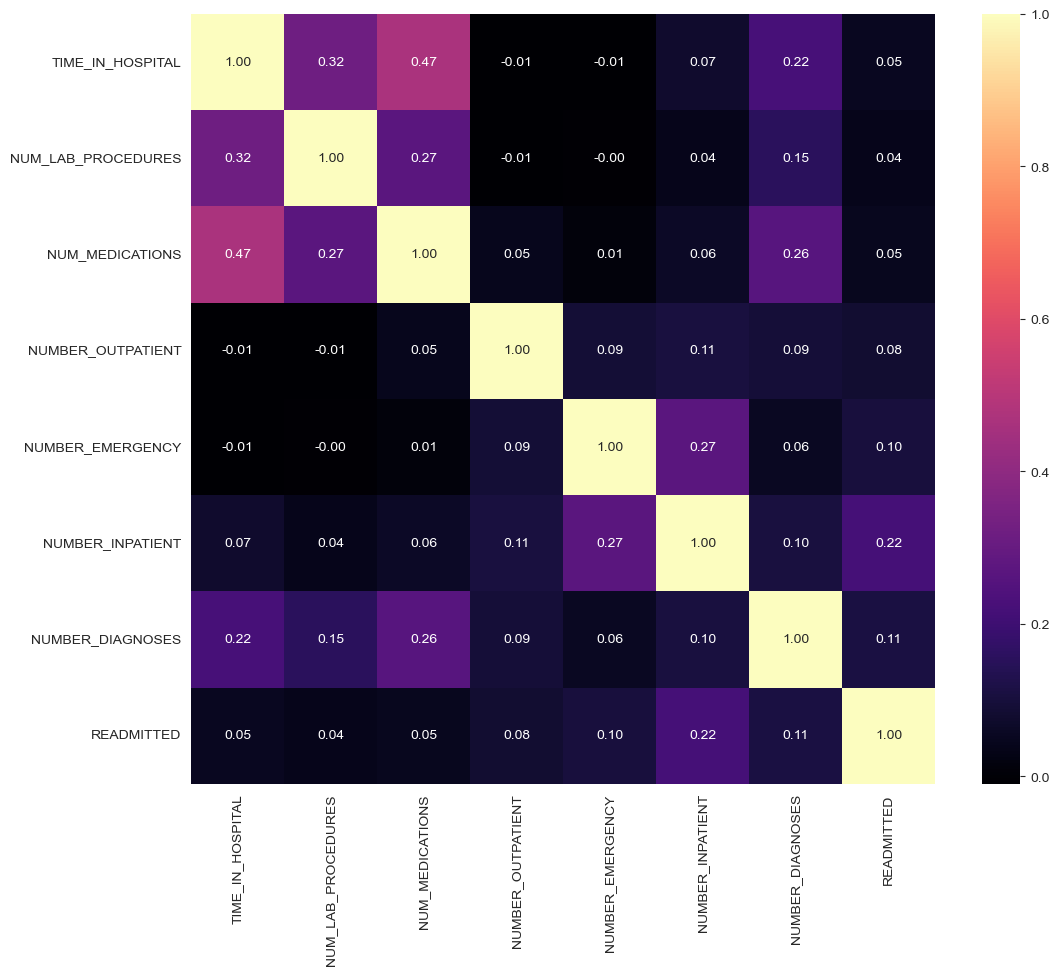

In [ ]:
# CORRELATION MATRIX
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="magma", fmt=".2f")


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_46319/637564926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="YlGnBu")


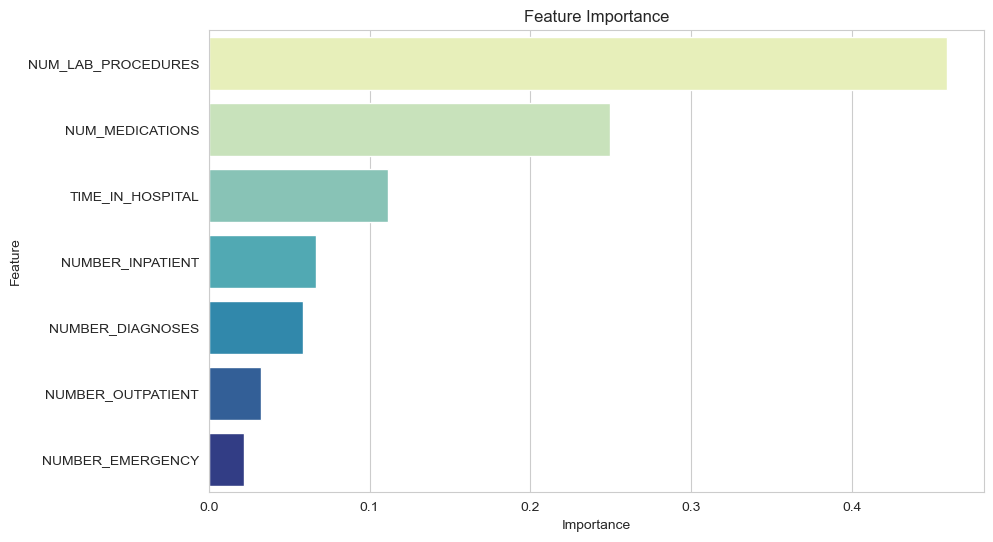

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Split the data into features (X) and target (y)
X = df[num_cols].drop("READMITTED", axis=1)
y = df["READMITTED"]

# Fit the random forest classifier to the data
rf.fit(X, y)

# Get the feature importances into a df
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

# Plotting feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="YlGnBu")
plt.title("Feature Importance")
plt.show()


#### 2. Categorical data


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_46319/346288572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AGE", data=df, palette="Set3", order=sorted(df["AGE"].unique()))


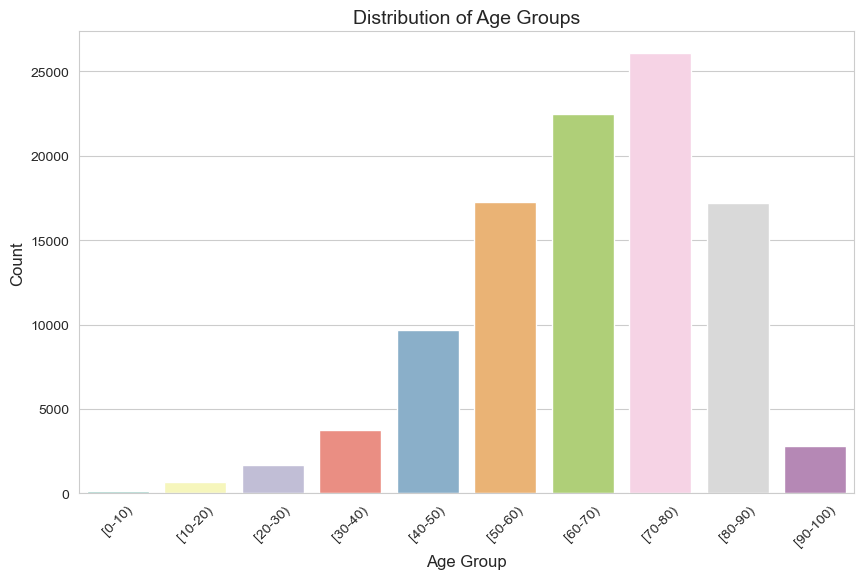

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="AGE", data=df, palette="Set3", order=sorted(df["AGE"].unique()))
plt.title("Distribution of Age Groups", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(cat_cols)


['RACE', 'GENDER', 'AGE', 'WEIGHT', 'PAYER_CODE', 'MAX_GLU_SERUM', 'A1CRESULT', 'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE', 'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE', 'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE', 'TOLAZAMIDE', 'EXAMIDE', 'CITOGLIPTON', 'INSULIN', 'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN', 'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE', 'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED', 'ADMISSION_TYPE_ID', 'NUM_PROCEDURES']


#### a. Medications


In [ ]:
# Splitting categorical features into medication and non-medication, as cat_med have the same output values
cat_med = [
    "ACARBOSE",
    "ACETOHEXAMIDE",
    "CHLORPROPAMIDE",
    "GLIMEPIRIDE",
    "GLIMEPIRIDE-PIOGLITAZONE",
    "GLIPIZIDE",
    "GLIPIZIDE-METFORMIN",
    "GLYBURIDE",
    "GLYBURIDE-METFORMIN",
    "INSULIN",
    "METFORMIN",
    "METFORMIN-PIOGLITAZONE",
    "METFORMIN-ROSIGLITAZONE",
    "MIGLITOL",
    "NATEGLINIDE",
    "PIOGLITAZONE",
    "REPAGLINIDE",
    "ROSIGLITAZONE",
    "TOLAZAMIDE",
    "TOLBUTAMIDE",
    "TROGLITAZONE",
]
cat_nonmed = [col for col in cat_cols if col not in cat_med]
print(cat_nonmed)


['RACE', 'GENDER', 'AGE', 'WEIGHT', 'PAYER_CODE', 'MAX_GLU_SERUM', 'A1CRESULT', 'EXAMIDE', 'CITOGLIPTON', 'CHANGE', 'DIABETESMED', 'READMITTED', 'ADMISSION_TYPE_ID', 'NUM_PROCEDURES']


In [ ]:
len(cat_med)


21

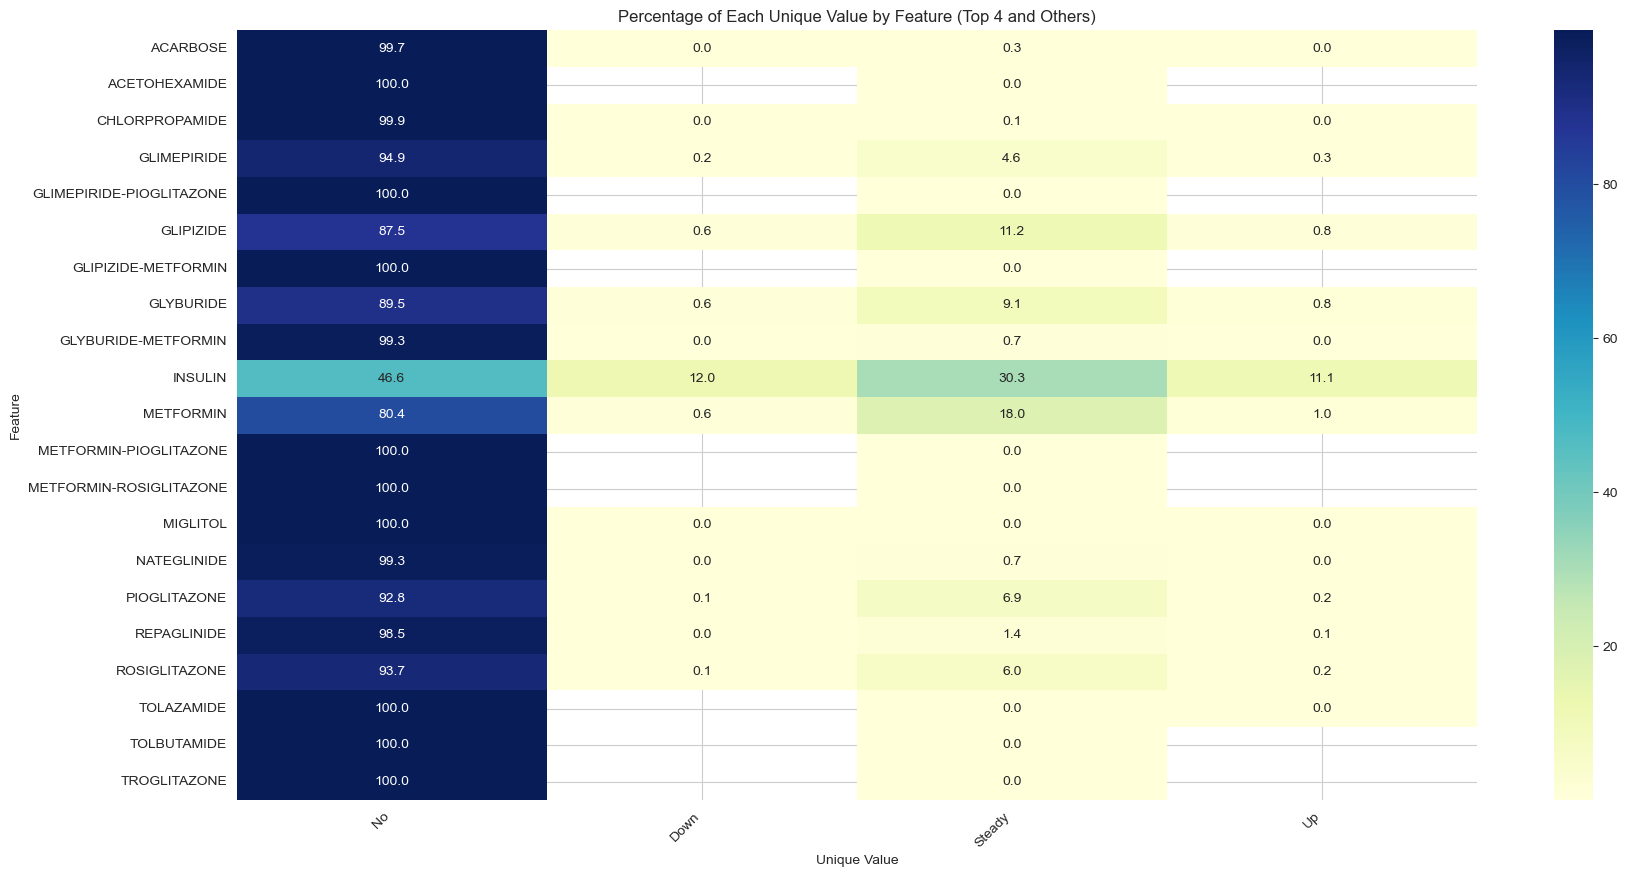

In [ ]:
# Medication heatmap data
heatmap_data = pd.DataFrame()

for col in cat_med:
    value_counts = df[col].value_counts()
    if len(value_counts) > 5:  # If more than 5 unique values
        # Take top 4 and create a Series for 'Other'
        top_values = value_counts.iloc[:4]
        other_sum = pd.Series(
            [value_counts.iloc[4:].sum()], index=["Other"]
        )  # Corrected to ensure 'Other' is a Series

        # Combine top values with 'Other' using concat
        new_values = pd.concat([top_values, other_sum])
        percentages = new_values / len(df) * 100
    else:
        percentages = value_counts / len(df) * 100

    # Create a temporary DataFrame to store the data for the current column
    temp_df = pd.DataFrame(
        {
            "Feature": col,
            "Unique Value": percentages.index,
            "Percentage": percentages.values,
        }
    )

    # Append the temporary DataFrame to the main heatmap_data DataFrame
    heatmap_data = pd.concat([heatmap_data, temp_df], ignore_index=True)

# Pivot the DataFrame to get a matrix suitable for a heatmap
pivot_table = heatmap_data.pivot(
    index="Feature", columns="Unique Value", values="Percentage"
)  # Corrected pivot call

# Reorder the x values
order = ["No", "Down", "Steady", "Up"]
pivot_table = pivot_table.reindex(columns=order)

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage of Each Unique Value by Feature (Top 4 and Others)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


In [ ]:
# # ! Savoir si je peux le faire avant
# # Removing outlier and useless columns

# # Step 1: Identify columns containing outliers
# cat_med_todelete = (
#     [  # Filtering hypothesis: No patient was prescribed with these cat_med
#         "TROGLITAZONE",
#         "TOLBUTAMIDE",
#         "TOLAZAMIDE",
#         "METFORMIN-ROSIGLITAZONE",
#         "METFORMIN-PIOGLITAZONE",
#         "GLIPIZIDE-METFORMIN",
#         "GLIMEPIRIDE-PIOGLITAZONE",
#         "CHLORPROPAMIDE",
#         "ACETOHEXAMIDE",
#         "ACARBOSE",
#     ]
# )

# # Step 2: Identify patients to remove
# patients_to_remove = set()
# for column in cat_med_todelete:
#     # Add patients who have medication not marked as 'No' to the set
#     patients_to_remove.update(df[df[column] != "No"]["PATIENT_NBR"].unique())

# # Step 3: Remove all rows associated with these patients
# df = df[~df["PATIENT_NBR"].isin(patients_to_remove)]

# # Step 4: Drop the features
# df.drop(cat_med_todelete, axis=1, inplace=True)

# # Step 5: Updating cat_med
# cat_med = [col for col in cat_med if col not in cat_med_todelete]
# cat_cols = [col for col in cat_cols if col not in cat_med_todelete]
# print(cat_med)


In [ ]:
# # ! A refaire seulement si celle davant est run


# # Medication heatmap data
# heatmap_data = pd.DataFrame()

# for col in cat_med:
#     value_counts = df[col].value_counts()
#     if len(value_counts) > 5:  # If more than 5 unique values
#         # Take top 4 and create a Series for 'Other'
#         top_values = value_counts.iloc[:4]
#         other_sum = pd.Series(
#             [value_counts.iloc[4:].sum()], index=["Other"]
#         )  # Corrected to ensure 'Other' is a Series

#         # Combine top values with 'Other' using concat
#         new_values = pd.concat([top_values, other_sum])
#         percentages = new_values / len(df) * 100
#     else:
#         percentages = value_counts / len(df) * 100

#     # Create a temporary DataFrame to store the data for the current column
#     temp_df = pd.DataFrame(
#         {
#             "Feature": col,
#             "Unique Value": percentages.index,
#             "Percentage": percentages.values,
#         }
#     )

#     # Append the temporary DataFrame to the main heatmap_data DataFrame
#     heatmap_data = pd.concat([heatmap_data, temp_df], ignore_index=True)

# # Pivot the DataFrame to get a matrix suitable for a heatmap
# pivot_table = heatmap_data.pivot(
#     index="Feature", columns="Unique Value", values="Percentage"
# )  # Corrected pivot call

# # Reorder the x values
# order = ["No", "Down", "Steady", "Up"]
# pivot_table = pivot_table.reindex(columns=order)

# # Plotting the heatmap
# plt.figure(figsize=(20, 10))
# sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
# plt.title("Percentage of Each Unique Value by Feature (Top 4 and Others)")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0)
# plt.show()


#### b. Non-medications


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_46319/346288572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AGE", data=df, palette="Set3", order=sorted(df["AGE"].unique()))


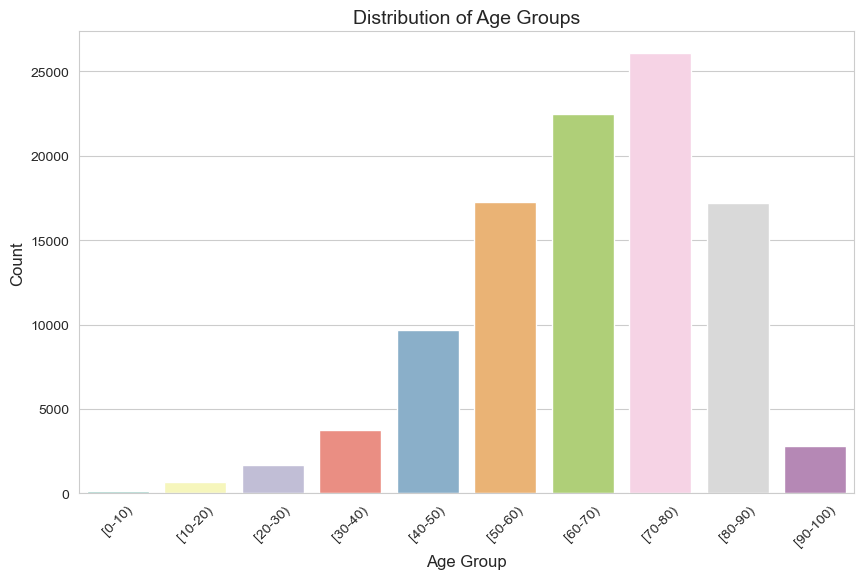

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="AGE", data=df, palette="Set3", order=sorted(df["AGE"].unique()))
plt.title("Distribution of Age Groups", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


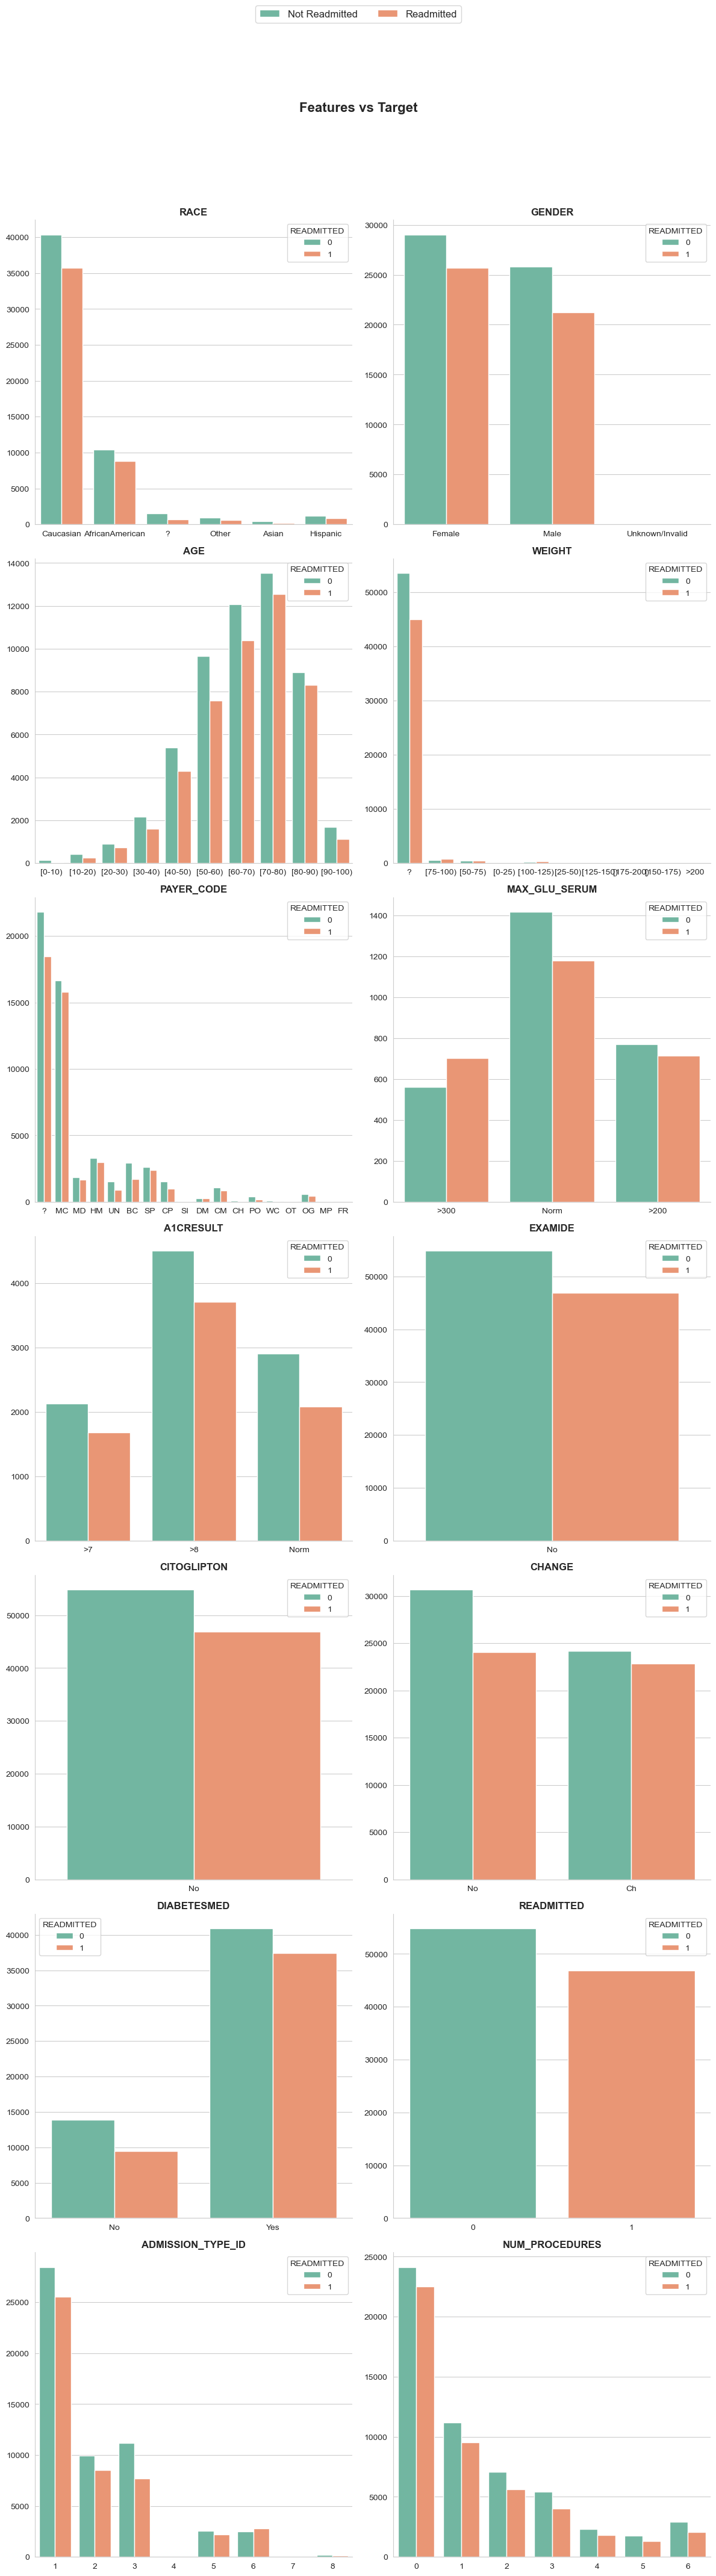

In [ ]:
# Categorical non-medication features hued per readmissions

# Determine the size and layout of the subplots
figsize = (12, len(cat_nonmed) * 3)  # Adjusted for better visualization
n_cols = 2  # Number of columns in the subplot grid
n_rows = len(cat_nonmed) // n_cols + (
    len(cat_nonmed) % n_cols > 0
)  # Add an extra row if there's an odd number of 'cat_cols'

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

for idx, cat_col in enumerate(cat_nonmed):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = (
        axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    )  # Adjust for when there's only one row
    sns.countplot(data=df, hue="READMITTED", x=cat_col, palette="Set2", ax=ax)

    # Improve subplot aesthetics
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("")
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{cat_col}", loc="center", weight="bold", fontsize=12)

# Hide any unused subplots
if len(cat_nonmed) % n_cols != 0:
    for idx in range(len(cat_nonmed), n_rows * n_cols):
        fig.delaxes(axes.flatten()[idx])

# Adjust the layout and add a title
fig.suptitle("Features vs Target", ha="center", fontweight="bold", fontsize=16)

# Add a legend outside the last subplot
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    ["Not Readmitted", "Readmitted"],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    fontsize=12,
)

plt.tight_layout(
    rect=[0, 0, 1, 0.95]
)  # Adjust the rect parameter to make space for the title and legend
plt.show()


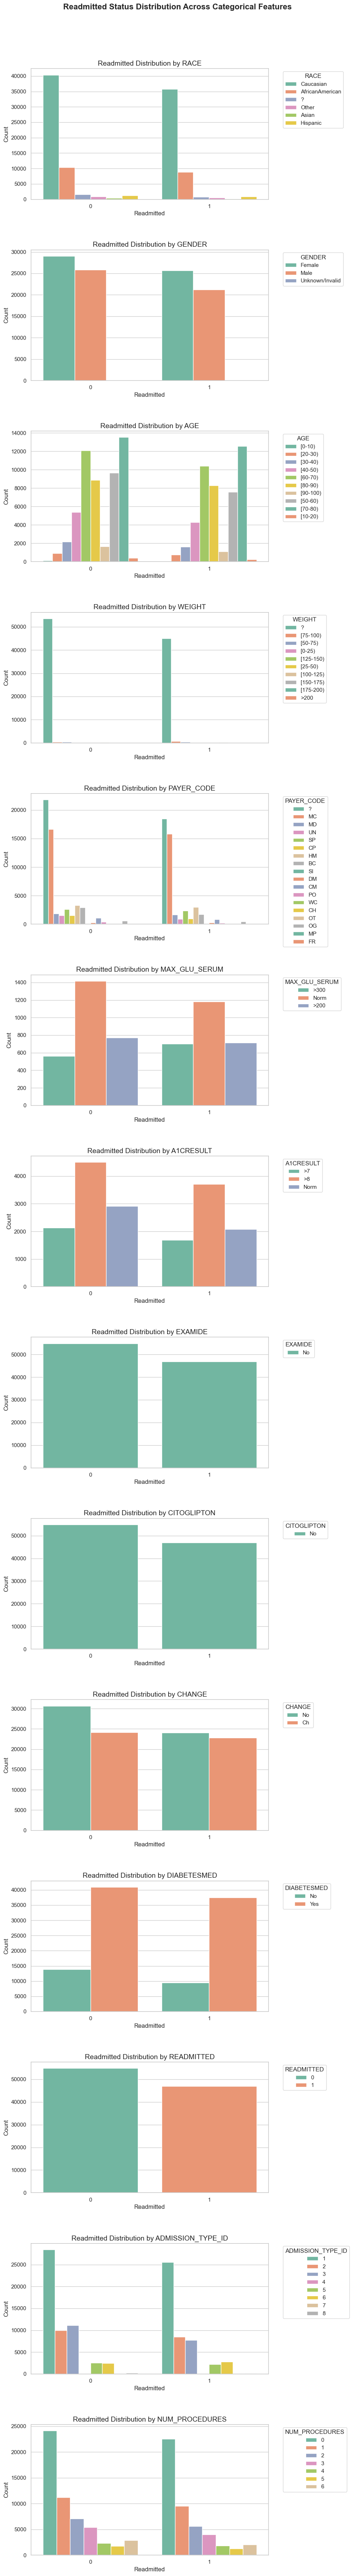

In [ ]:
# Readmissions hued per non-medication categorical features

# Layout Setup
sns.set(style="whitegrid")
num_features = len(cat_nonmed)
figsize = (
    10,
    5 * num_features,
)  # Height is scaled by the number of features for clarity

# Create a figure to hold the subplots
fig = plt.figure(figsize=figsize)

# Iterate over each categorical feature to create a subplot
for idx, cat_col in enumerate(cat_nonmed):
    ax = fig.add_subplot(num_features, 1, idx + 1)
    sns.countplot(data=df, x="READMITTED", hue=cat_col, palette="Set2", ax=ax)

    # Improve subplot aesthetics
    ax.set_ylabel("Count")
    ax.set_xlabel("Readmitted")
    ax.set_title(f"Readmitted Distribution by {cat_col}", fontsize=14)
    ax.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a main title
fig.suptitle(
    "Readmitted Status Distribution Across Categorical Features",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)

plt.show()


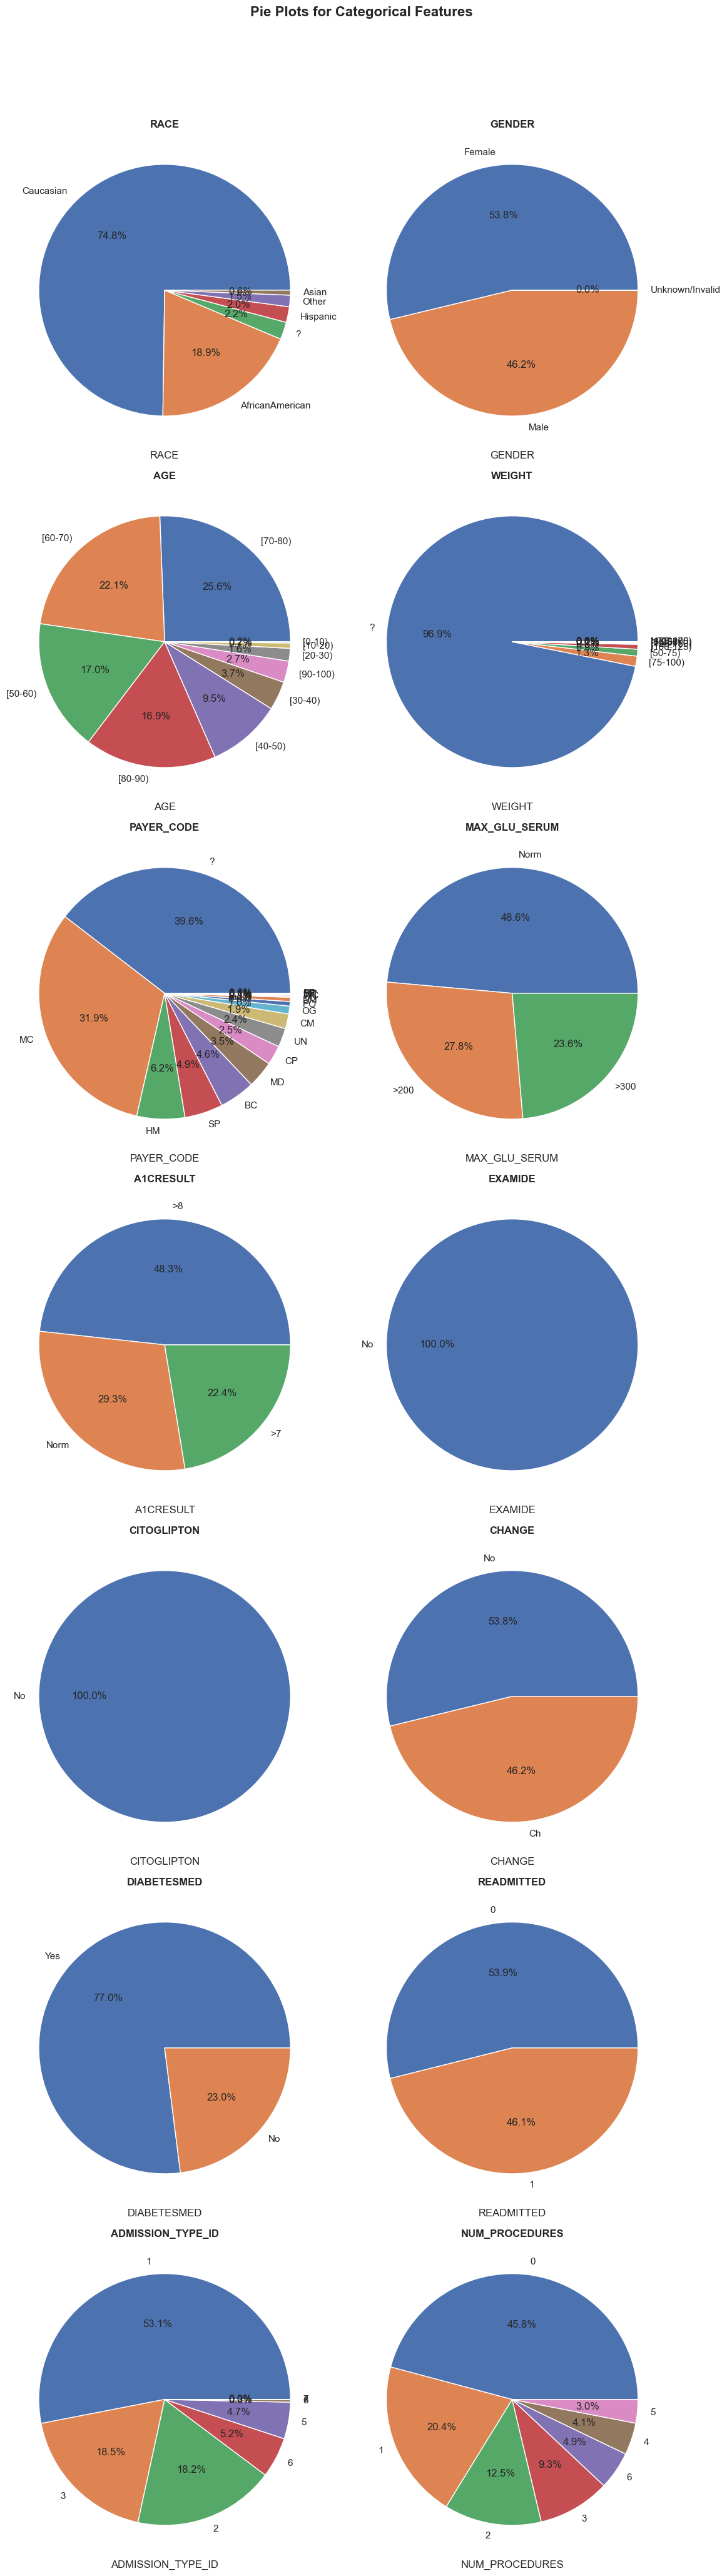

In [ ]:
# Determine the size and layout of the subplots
figsize = (12, len(cat_nonmed) * 3)  # Adjusted for better visualization
n_cols = 2  # Number of columns in the subplot grid
n_rows = len(cat_nonmed) // n_cols + (
    len(cat_nonmed) % n_cols > 0
)  # Add an extra row if there's an odd number of 'cat_nonmed'

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

for idx, cat_col in enumerate(cat_nonmed):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = (
        axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    )  # Adjust for when there's only one row
    df[cat_col].value_counts().plot.pie(ax=ax, autopct="%.1f%%")

    # Improve subplot aesthetics
    ax.set_ylabel("")
    ax.set_xlabel(cat_col)
    ax.set_title(f"{cat_col}", loc="center", weight="bold", fontsize=12)

# Hide any unused subplots
if len(cat_nonmed) % n_cols != 0:
    for idx in range(len(cat_nonmed), n_rows * n_cols):
        fig.delaxes(axes.flatten()[idx])

# Adjust the layout and add a title
fig.suptitle(
    "Pie Plots for Categorical Features", ha="center", fontweight="bold", fontsize=16
)

plt.tight_layout(
    rect=[0, 0, 1, 0.95]
)  # Adjust the rect parameter to make space for the title

plt.show()


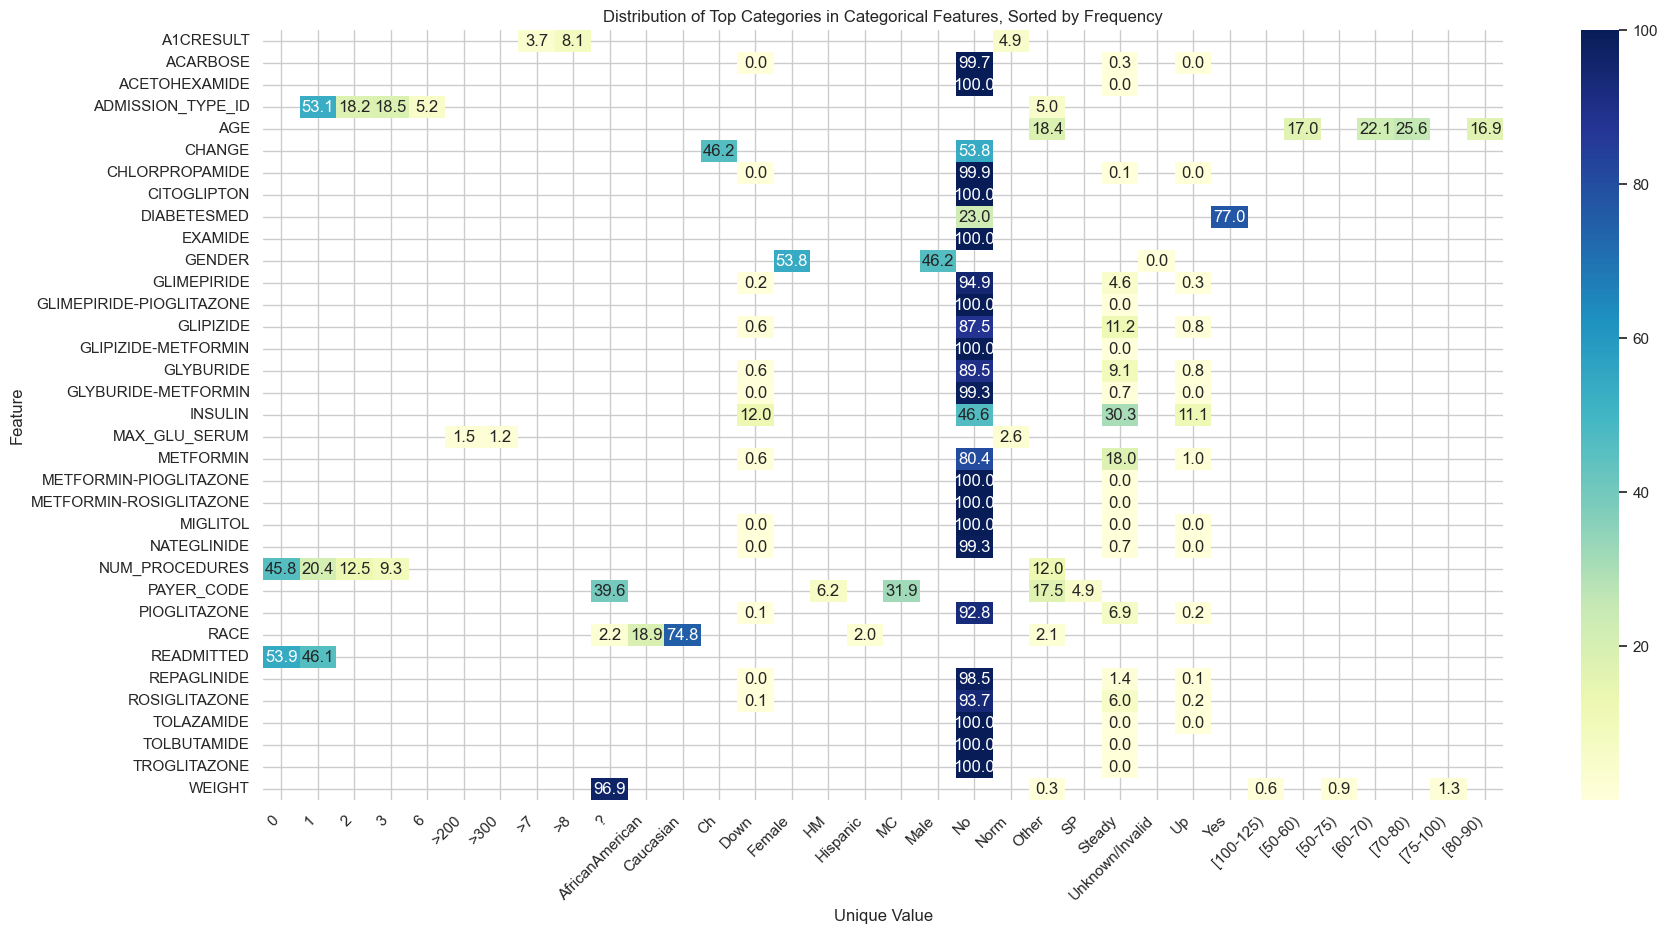

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'cat_cols' is your list of categorical columns

# Initialize an empty DataFrame to store the heatmap data
heatmap_data = pd.DataFrame()

for col in cat_cols:
    # Sort the unique values by count within the feature
    value_counts = df[col].value_counts().sort_values(ascending=False)
    if len(value_counts) > 5:  # If more than 5 unique values
        # Take top 4 and create a Series for 'Other'
        top_values = value_counts.iloc[:4]
        other_sum = pd.Series(
            [value_counts.iloc[4:].sum()], index=["Other"]
        )  # Corrected to ensure 'Other' is a Series

        # Combine top values with 'Other' using concat
        new_values = pd.concat([top_values, other_sum])
        percentages = new_values / len(df) * 100
    else:
        percentages = value_counts / len(df) * 100

    # Create a temporary DataFrame to store the data for the current column
    temp_df = pd.DataFrame(
        {
            "Feature": col,
            "Unique Value": percentages.index,
            "Percentage": percentages.values,
        }
    )

    # Append the temporary DataFrame to the main heatmap_data DataFrame
    heatmap_data = pd.concat([heatmap_data, temp_df], ignore_index=True)

# Pivot the DataFrame to get a matrix suitable for a heatmap
pivot_table = heatmap_data.pivot(
    index="Feature", columns="Unique Value", values="Percentage"
)  # Corrected pivot call

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Distribution of Top Categories in Categorical Features, Sorted by Frequency")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


### 3. Categorical numerically-encoded


In [ ]:
df[cat_but_car]


,MEDICAL_SPECIALTY,DIAG_1,DIAG_2,DIAG_3
0,Pediatrics-Endocrinology,250.83,?,?
1,?,276,250.01,255
2,?,648,250,V27
3,?,8,250.43,403
4,?,197,157,250
...,...,...,...,...
101761,?,250.13,291,458
101762,?,560,276,787
101763,?,38,590,296
101764,Surgery-General,996,285,998


### 4. Numerical categorically encoded


##  Task 2: Data assembling and initial pre-processing (15%)


In [ ]:
print(df.columns)


Index(['ENCOUNTER_ID', 'PATIENT_NBR', 'RACE', 'GENDER', 'AGE', 'WEIGHT',
       'ADMISSION_TYPE_ID', 'DISCHARGE_DISPOSITION_ID', 'ADMISSION_SOURCE_ID',
       'TIME_IN_HOSPITAL', 'PAYER_CODE', 'MEDICAL_SPECIALTY',
       'NUM_LAB_PROCEDURES', 'NUM_PROCEDURES', 'NUM_MEDICATIONS',
       'NUMBER_OUTPATIENT', 'NUMBER_EMERGENCY', 'NUMBER_INPATIENT', 'DIAG_1',
       'DIAG_2', 'DIAG_3', 'NUMBER_DIAGNOSES', 'MAX_GLU_SERUM', 'A1CRESULT',
       'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE',
       'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE',
       'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE',
       'TOLAZAMIDE', 'EXAMIDE', 'CITOGLIPTON', 'INSULIN',
       'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN',
       'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE',
       'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED'],
      dtype='object')


### 1. Sampling


### 2. Preprocessing


#### a. Dropping


In [ ]:
df.shape


(101766, 50)

In [ ]:
# # Dropping columns

# ## empty columns
# df.drop(
#     [
#         "MAX_GLU_SERUM",
#         "A1CRESULT",
#         "WEIGHT",
#         "PAYER_CODE",
#         "MEDICAL_SPECIALTY",  # Empty columns
#         "EXAMIDE",
#         "CITOGLIPTON",
#     ],  # Unique value
#     axis=1,
#     inplace=True,
# )


In [ ]:
# # Assessing missing values per patients

# ## RACE
# unknown_race_patients = df[df["RACE"] == "?"][["PATIENT_NBR", "RACE"]]
# # Find duplicated patients within the unknown_race_patients DataFrame
# # 'keep=False' marks all duplicates as True
# multiple_unknown_race_patients = unknown_race_patients[
#     unknown_race_patients.duplicated("PATIENT_NBR", keep=False)
# ]
# multiple_unknown_race_patients

# ## GENDER

# count_unknown_gender = df[df["GENDER"] == "Unknown/Invalid"].shape[0]
# print(f"The number of Unknown in Gender is {count_unknown_gender}")

# unknown_gender_patients = df[df["GENDER"] == "Unknown/Invalid"]["PATIENT_NBR"]
# multiple_unknown_gender_patients = unknown_gender_patients[
#     unknown_gender_patients.duplicated()
# ]
# multiple_unknown_gender_patients


In [ ]:
# df = df[(df["RACE"] != "?") & (df["GENDER"] != "Unknown/Invalid")]


In [ ]:
# # Removing outlier and useless columns

# # Step 1: Identify columns containing outliers
# cat_med_todelete = (
#     [  # Filtering hypothesis: No patient was prescribed with these cat_med
#         "TROGLITAZONE",
#         "TOLBUTAMIDE",
#         "TOLAZAMIDE",
#         "METFORMIN-ROSIGLITAZONE",
#         "METFORMIN-PIOGLITAZONE",
#         "GLIPIZIDE-METFORMIN",
#         "GLIMEPIRIDE-PIOGLITAZONE",
#         "CHLORPROPAMIDE",
#         "ACETOHEXAMIDE",
#         "ACARBOSE",
#     ]
# )

# # Step 2: Identify patients to remove
# patients_to_remove = set()
# for column in cat_med_todelete:
#     # Add patients who have medication not marked as 'No' to the set
#     patients_to_remove.update(df[df[column] != "No"]["PATIENT_NBR"].unique())

# # Step 3: Remove all rows associated with these patients
# df = df[~df["PATIENT_NBR"].isin(patients_to_remove)]

# # Step 4: Drop the features
# df.drop(cat_med_todelete, axis=1, inplace=True)

# # Step 5: Updating cat_med
# dropped_columns = [
#     "MAX_GLU_SERUM",
#     "A1CRESULT",
#     "WEIGHT",
#     "PAYER_CODE",
#     "MEDICAL_SPECIALTY",  # Empty columns
#     "EXAMIDE",
#     "CITOGLIPTON",
#     "MAX_GLU_SERUM",
#     "A1CRESULT",
#     "WEIGHT",
#     "PAYER_CODE",
#     "MEDICAL_SPECIALTY",  # Empty columns
#     "EXAMIDE",
#     "CITOGLIPTON",
# ]

# cat_med = [col for col in cat_med if col not in dropped_columns]
# cat_cols = [col for col in cat_cols if col not in dropped_columns]


In [ ]:
# df.shape
# df.info()


#### b. Encoding


In [ ]:
# # Target encoding -> Binary classification
# df["READMITTED"] = df["READMITTED"].apply(lambda x: 0 if x == "NO" else 1)


In [ ]:
# label_encoding = [
#     "AGE",  # Ordinal
#     "DIABETESMED",  # Binary
#     "GENDER",  # Binary
#     "METFORMIN",  # Ordinal
#     "INSULIN",  # Ordinal
#     "CHANGE",  # Binary
# ]


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D


# def visualise_data(X, labels=None, column_names=None, set_labels=False):
#     """
#     Visualize the data with 2D or 3D scatter plot.

#     @param X: DataFrame containing the data to be plotted.
#     @param labels: Default is None, but if you have labels from clustering, you can pass them here.
#     @param column_names: List of column names of dataset X to be selected for plotting; List with two elements for a 2D plot, or three elements for a 3D plot.
#     @param set_labels: If True, set column names as labels for the axes.
#     """
#     assert type(column_names) in [list, tuple], "column_names must be a list or a tuple"
#     assert len(column_names) in [
#         2,
#         3,
#     ], "You must provide two or three column names for 2D or 3D plot, respectively"

#     if len(column_names) == 2:  # 2D
#         if set_labels:
#             plt.xlabel(column_names[0])
#             plt.ylabel(column_names[1])

#         plt.scatter(X[column_names[0]], X[column_names[1]], c=labels)

#     elif len(column_names) == 3:  # 3D
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection="3d")

#         if set_labels:
#             ax.set_xlabel(column_names[0])
#             ax.set_ylabel(column_names[1])
#             ax.set_zlabel(column_names[2])

#         ax.scatter(X[column_names[0]], X[column_names[1]], X[column_names[2]], c=labels)

#     plt.tight_layout()
#     plt.show()


In [ ]:
# visualise_data(df[cat_cols], labels=df["READMITTED"], column_names=["INSULIN", "METFORMIN"])


In [ ]:
# onehot_encoding = [
#     "MEDICAL_SPECIALITY",
#     "DIAG_1" "DIAG_2",
#     "DIAG_3",
#     "RACE",  # Non-ordinal categorical feature
#     "PAYER_CODE",
# ]  # Non-ordinal categorical feature


In [ ]:
# dropping_features = [
#     "MAX_GLU_SERUM",
#     "PATIENT_NBR",
#     "METFORMIN-ROSIGLITAZONE" "TOLBUTAMIDE",
# ]


### 3. Data Analysis


#### 1. Numerical columns


#### 2. Categorical columns
